# DeepLearning 데이터 분석 구조
 - 데이터 로드 및 전처리 → 모델 구성 및 컴파일 → 모델 학습 → 모델 평가 및 예측

 - 모델 최적화를 위해 ModelCheckpoint 등을 활용하여 모델을 저장하고, 학습과 평가, 예측을 반복 수행함. (이번 미니 프로젝트에서는 수행하지 않음)

 - 사용된 데이터 셋
     - Boston 주택 가격 예측 모델 (회귀 문제, MSE 손실 함수 사용)
     - Reuters 뉴스 분류 모델 (텍스트 분류, categorical_crossentropy 사용)
     - CIFAR10 이미지 분류 모델(이미지 분류, categorical_crossentropy 사용)

 - 모델 별 결과 요약
  - Boston: Test MSE = 20.74, Test MAE = 2.80  
  - Reuters: Test Loss = 0.97, Test Accuracy = 0.79  
  - CIFAR-10: Test Loss = 1.36, Test Accuracy = 0.51  

- 적용한 최적화 기법:
 - BatchNormalization, Dropout
 - EarlyStopping, ModelCheckpoint
 - 옵티마이저: Adam
 - 손실 함수: MSE (Boston), categorical_crossentropy (Reuters, CIFAR-10)

- 결론
 - 텍스트 데이터가 이미지 데이터보다 더 높은 정확도를 보였음
 - 정규화와 드롭아웃 기법이 과적합 방지에 효과적이었음

# Boston 주택가격 예측 모델

## 데이터 로드 및 전처리

- 데이터 로드

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
404
102


- 전처리

In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data -= mean  # 평균 빼기

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data /= std   # 표준편차로 나누기

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= std

## 모델 구성 및 컴파일

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

# 모델 구성
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # 출력층: 회귀 문제이므로 활성화 함수 없음

# 모델 컴파일
model.compile(optimizer='rmsprop',
              loss='mse',               # 평균 제곱 오차
              metrics=['mae'])          # 평균 절대 오차

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 모델 학습

In [5]:
# 모델 학습
history = model.fit(train_data, train_labels,
                    epochs=100,
                    batch_size=16,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 509.9544 - mae: 20.5307 - val_loss: 506.3053 - val_mae: 20.4040
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 440.3621 - mae: 18.5874 - val_loss: 368.5820 - val_mae: 16.7338
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 297.8864 - mae: 14.7448 - val_loss: 221.5244 - val_mae: 12.0707
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 146.2794 - mae: 9.6412 - val_loss: 122.3479 - val_mae: 8.0229
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 80.9215 - mae: 6.5032 - val_loss: 75.2142 - val_mae: 6.3319
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 46.0373 - mae: 5.0213 - val_loss: 52.6491 - val_mae: 5.4236
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32.1803 - mae: 4.2702 - val_loss: 41.3480 - val_mae: 4.6518
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.9729 - mae: 3.4073 - val_loss: 32.1074 - val_mae: 4.1524
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━

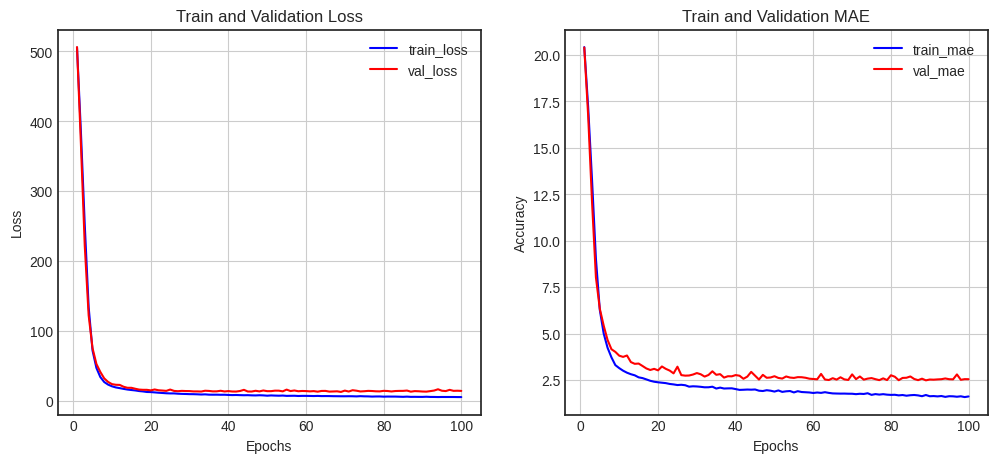

In [7]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-v0_8-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

In [8]:
# 테스트 데이터셋을 이용해 모델 평가
test_loss, test_mae = model.evaluate(test_data, test_labels, verbose=1)

print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 16.2066 - mae: 2.5966
Test Loss (MSE): 20.7406
Test MAE: 2.7984


# Reuters 딥러닝 모델

## 데이터 로드 및 전처리

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [10]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# Reuters 데이터셋 로드
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 훈련 데이터를 학습용과 검증용으로 분리 (25%를 검증용으로 사용)
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.25, random_state=42
)

# 데이터 개수 출력
print(f"훈련 데이터 개수: {len(train_data)}")
print(f"검증 데이터 개수: {len(val_data)}")
print(f"테스트 데이터 개수: {len(test_data)}")

# 레이블 종류 개수 출력
print(f"레이블 종류 수: {len(set(train_labels))}")

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
훈련 데이터 개수: 6736
검증 데이터 개수: 2246
테스트 데이터 개수: 2246
레이블 종류 수: 46


- 텍스트 데이터 전처리 = 원-핫 인코딩
- 레이블 데이터들은 범주형 형태이므로  to_categorical() 함수 사용

In [12]:
import numpy as np
from tensorflow.keras.utils import to_categorical

def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        for idx in sequence:
            if idx < dim:
                results[i, idx] = 1
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

y_train = to_categorical(train_labels)
y_val = to_categorical(val_labels)
y_test = to_categorical(test_labels)

## 모델 구성 및 컴파일
- BatchNormalization과 Dropout을 적용

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

model = Sequential([
    Dense(512, activation='relu', input_shape=(10000,)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(46, activation='softmax')  # Reuters 데이터셋 레이블 개수에 맞춰 출력층 구성
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 46)             │        11,822 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,266,734 (20.09 MB)

 Trainable params: 5,265,198 (20.09 MB)

 Non-trainable params: 1,536 (6.00 KB)

## 모델 학습
- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 체크포인트: 검증 정확도 기준 최고 모델 저장
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

# 얼리스토핑: 검증 손실이 3 에포크 연속 개선 없으면 학습 중단
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint, early_stopping]
)


Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.4701 - loss: 2.6313
Epoch 1: val_accuracy improved from -inf to 0.71728, saving model to best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 234ms/step - accuracy: 0.4730 - loss: 2.6177 - val_accuracy: 0.7173 - val_loss: 2.5767
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.8528 - loss: 0.7113
Epoch 2: val_accuracy improved from 0.71728 to 0.73108, saving model to best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.8528 - loss: 0.7113 - val_accuracy: 0.7311 - val_loss: 2.1144
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9140 - loss: 0.3931
Epoch 3: val_accuracy improved from 0.73108 to 0.77293, saving model to best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - accuracy: 0.9140 - loss: 0.3931 - val_accuracy: 0.7729 - val_loss: 1.5512
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.9475 - loss: 0.2578
Epoch 4: val_accuracy improved from 0.77293 to 0.78718, saving model to best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 220ms/step - accuracy: 0.9474 - loss: 0.2580 - val_accuracy: 0.7872 - val_loss: 1.1993
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9593 - loss: 0.1964
Epoch 5: val_accuracy improved from 0.78718 to 0.80721, saving model to best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.9591 - loss: 0.1968 - val_accuracy: 0.8072 - val_loss: 0.9936
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9591 - loss: 0.1752
Epoch 6: val_accuracy improved from 0.80721 to 0.81256, saving model to best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.9590 - loss: 0.1757 - val_accuracy: 0.8126 - val_loss: 0.9144
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.9621 - loss: 0.1715
Epoch 7: val_accuracy did not improve from 0.81256
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.9621 - loss: 0.1716 - val_accuracy: 0.8112 - val_loss: 0.9482
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9664 - loss: 0.1515
Epoch 8: val_accuracy improved from 0.81256 to 0.82324, saving model to best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - accuracy: 0.9664 - loss: 0.1518 - val_accuracy: 0.8232 - val_loss: 0.9690
Epoch 9/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.9705 - loss: 0.1348
Epoch 9: val_accuracy improved from 0.82324 to 0.82502, saving model to best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.9704 - loss: 0.1351 - val_accuracy: 0.8250 - val_loss: 0.9957
Epoch 9: early stopping
Restoring model weights from the end of the best epoch: 6.


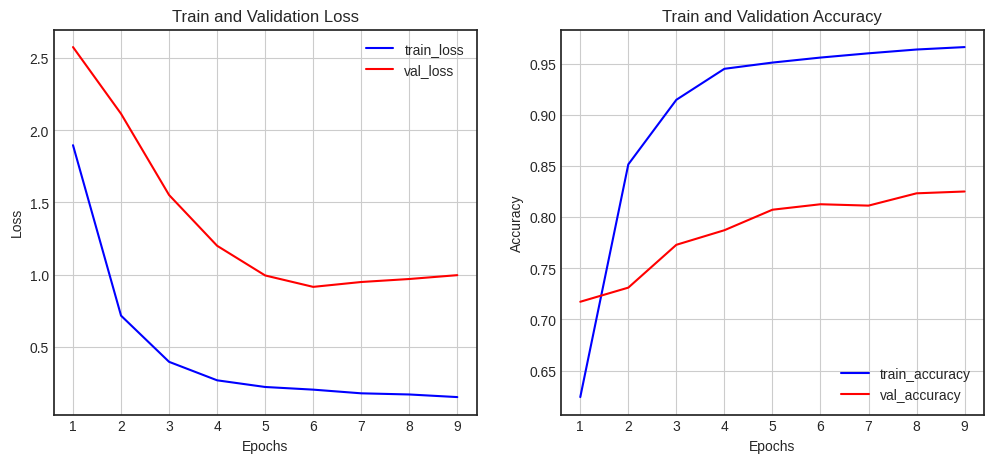

In [17]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-v0_8-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

In [20]:
# 테스트 데이터로 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f"테스트 손실: {test_loss:.4f}")
print(f"테스트 정확도: {test_accuracy:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7967 - loss: 0.9611
테스트 손실: 0.9741
테스트 정확도: 0.7947


# CIFAR10 딥러닝 모델

## 데이터 로드 및 전처리

In [21]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [22]:
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# CIFAR-10 데이터 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 픽셀 정규화 (0~1 범위)
x_train_full = x_train_full.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 훈련 데이터를 학습용과 검증용으로 분리 (20%를 검증용으로 사용)
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

# 데이터 개수 출력
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [23]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

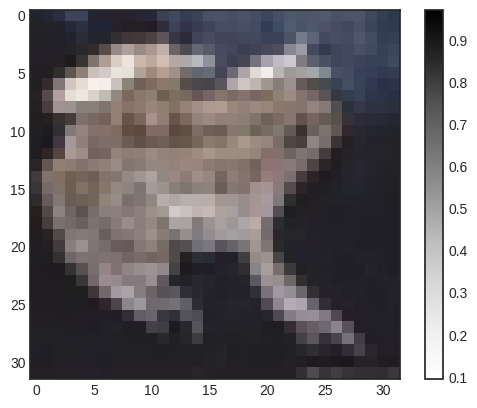

In [26]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-v0_8-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [27]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


- 데이터 형태를 변형하여 모델이 학습할 수 있게함.

In [28]:
# (32, 32, 3) → (3072,)로 reshape
x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))
x_val = x_val.reshape((x_val.shape[0], 32 * 32 * 3))
x_test = x_test.reshape((x_test.shape[0], 32 * 32 * 3))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [29]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 모델 구성 및 컴파일
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical

# 레이블을 원-핫 인코딩
y_train_cat = to_categorical(y_train, num_classes=10)
y_val_cat = to_categorical(y_val, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# 모델 구성
model = Sequential([
    Dense(512, activation='relu', input_shape=(3072,)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(10, activation='softmax')  # CIFAR-10은 10개 클래스
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 구조 출력
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,742,474 (6.65 MB)

 Trainable params: 1,740,682 (6.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

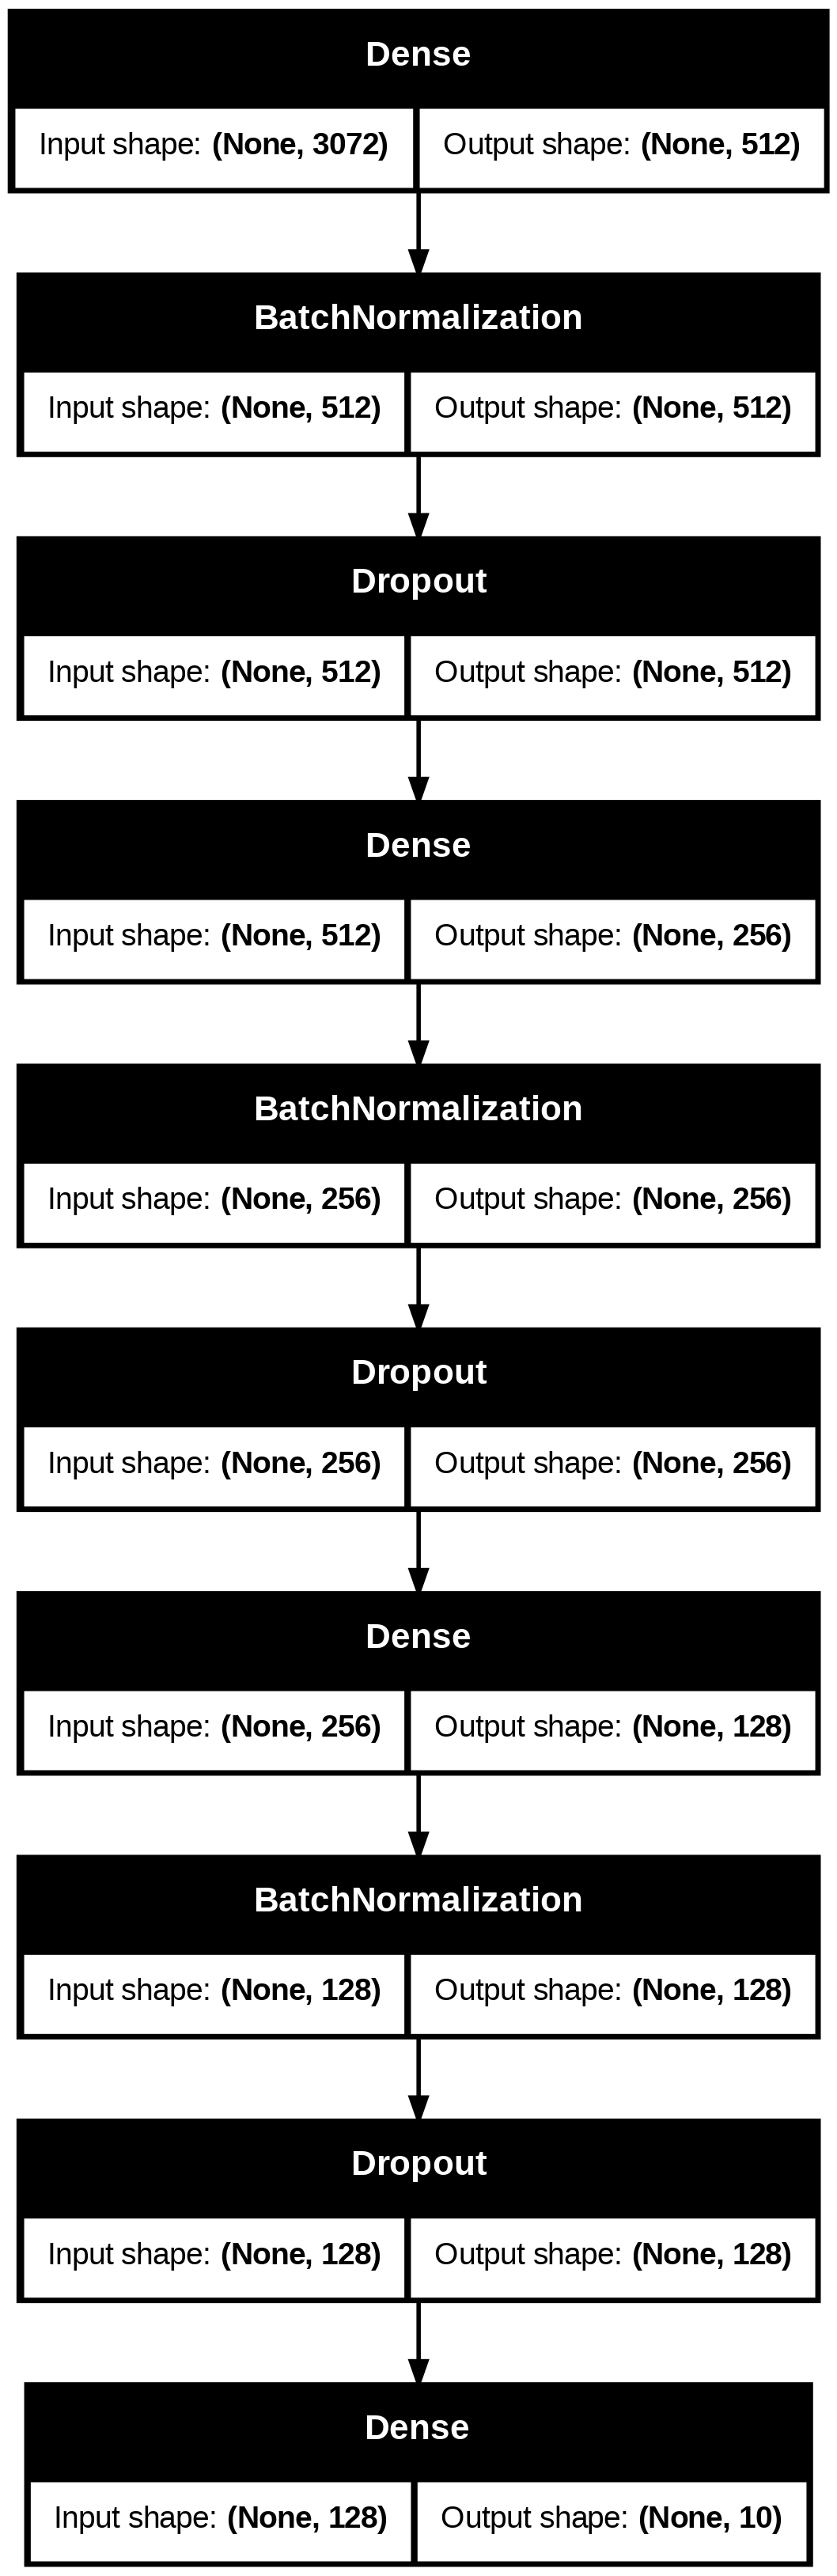

In [31]:
utils.plot_model(model, show_shapes=True)

## 모델 학습
 - ModelCheckpoint와 EarlyStopping 콜백 함수를 적용

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint: 검증 정확도가 최고일 때 모델 저장
checkpoint = ModelCheckpoint(
    'cifar10_best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1,
    mode='max'
)

# EarlyStopping: 검증 손실이 개선되지 않으면 조기 종료
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# 모델 학습
history = model.fit(
    x_train, y_train_cat,
    epochs=50,
    batch_size=128,
    validation_data=(x_val, y_val_cat),
    callbacks=[checkpoint, early_stopping],
    verbose=2
)


Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.12500, saving model to cifar10_best_model.h5


313/313 - 18s - 59ms/step - accuracy: 0.2893 - loss: 2.0536 - val_accuracy: 0.1250 - val_loss: 2.2553
Epoch 2/50

Epoch 2: val_accuracy improved from 0.12500 to 0.40030, saving model to cifar10_best_model.h5


313/313 - 17s - 54ms/step - accuracy: 0.3625 - loss: 1.7789 - val_accuracy: 0.4003 - val_loss: 1.7013
Epoch 3/50

Epoch 3: val_accuracy improved from 0.40030 to 0.43180, saving model to cifar10_best_model.h5


313/313 - 17s - 56ms/step - accuracy: 0.3943 - loss: 1.6940 - val_accuracy: 0.4318 - val_loss: 1.5967
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.43180
313/313 - 14s - 43ms/step - accuracy: 0.4127 - loss: 1.6434 - val_accuracy: 0.4311 - val_loss: 1.5985
Epoch 5/50

Epoch 5: val_accuracy improved from 0.43180 to 0.43670, saving model to cifar10_best_model.h5


313/313 - 22s - 71ms/step - accuracy: 0.4261 - loss: 1.6134 - val_accuracy: 0.4367 - val_loss: 1.5540
Epoch 6/50

Epoch 6: val_accuracy did not improve from 0.43670
313/313 - 21s - 66ms/step - accuracy: 0.4340 - loss: 1.5810 - val_accuracy: 0.4283 - val_loss: 1.5967
Epoch 7/50

Epoch 7: val_accuracy improved from 0.43670 to 0.45380, saving model to cifar10_best_model.h5


313/313 - 19s - 61ms/step - accuracy: 0.4408 - loss: 1.5638 - val_accuracy: 0.4538 - val_loss: 1.5029
Epoch 8/50

Epoch 8: val_accuracy did not improve from 0.45380
313/313 - 21s - 66ms/step - accuracy: 0.4466 - loss: 1.5500 - val_accuracy: 0.4469 - val_loss: 1.5228
Epoch 9/50

Epoch 9: val_accuracy did not improve from 0.45380
313/313 - 19s - 61ms/step - accuracy: 0.4521 - loss: 1.5332 - val_accuracy: 0.4467 - val_loss: 1.5615
Epoch 10/50

Epoch 10: val_accuracy improved from 0.45380 to 0.46510, saving model to cifar10_best_model.h5


313/313 - 21s - 66ms/step - accuracy: 0.4562 - loss: 1.5264 - val_accuracy: 0.4651 - val_loss: 1.4778
Epoch 11/50

Epoch 11: val_accuracy did not improve from 0.46510
313/313 - 20s - 65ms/step - accuracy: 0.4598 - loss: 1.5148 - val_accuracy: 0.4540 - val_loss: 1.5077
Epoch 12/50

Epoch 12: val_accuracy did not improve from 0.46510
313/313 - 14s - 46ms/step - accuracy: 0.4622 - loss: 1.5044 - val_accuracy: 0.4545 - val_loss: 1.5047
Epoch 13/50

Epoch 13: val_accuracy improved from 0.46510 to 0.48250, saving model to cifar10_best_model.h5


313/313 - 14s - 43ms/step - accuracy: 0.4651 - loss: 1.4965 - val_accuracy: 0.4825 - val_loss: 1.4385
Epoch 14/50

Epoch 14: val_accuracy did not improve from 0.48250
313/313 - 20s - 65ms/step - accuracy: 0.4673 - loss: 1.4842 - val_accuracy: 0.4794 - val_loss: 1.4426
Epoch 15/50

Epoch 15: val_accuracy did not improve from 0.48250
313/313 - 20s - 65ms/step - accuracy: 0.4764 - loss: 1.4715 - val_accuracy: 0.4681 - val_loss: 1.4873
Epoch 16/50

Epoch 16: val_accuracy improved from 0.48250 to 0.48570, saving model to cifar10_best_model.h5


313/313 - 21s - 68ms/step - accuracy: 0.4758 - loss: 1.4661 - val_accuracy: 0.4857 - val_loss: 1.4507
Epoch 17/50

Epoch 17: val_accuracy did not improve from 0.48570
313/313 - 20s - 64ms/step - accuracy: 0.4789 - loss: 1.4585 - val_accuracy: 0.4815 - val_loss: 1.4457
Epoch 18/50

Epoch 18: val_accuracy improved from 0.48570 to 0.48650, saving model to cifar10_best_model.h5


313/313 - 20s - 65ms/step - accuracy: 0.4812 - loss: 1.4503 - val_accuracy: 0.4865 - val_loss: 1.4271
Epoch 19/50

Epoch 19: val_accuracy improved from 0.48650 to 0.49630, saving model to cifar10_best_model.h5


313/313 - 13s - 42ms/step - accuracy: 0.4859 - loss: 1.4407 - val_accuracy: 0.4963 - val_loss: 1.4054
Epoch 20/50

Epoch 20: val_accuracy improved from 0.49630 to 0.50270, saving model to cifar10_best_model.h5


313/313 - 22s - 69ms/step - accuracy: 0.4851 - loss: 1.4363 - val_accuracy: 0.5027 - val_loss: 1.4049
Epoch 21/50

Epoch 21: val_accuracy did not improve from 0.50270
313/313 - 20s - 63ms/step - accuracy: 0.4918 - loss: 1.4339 - val_accuracy: 0.4826 - val_loss: 1.4364
Epoch 22/50

Epoch 22: val_accuracy did not improve from 0.50270
313/313 - 14s - 43ms/step - accuracy: 0.4915 - loss: 1.4258 - val_accuracy: 0.4896 - val_loss: 1.4409
Epoch 23/50

Epoch 23: val_accuracy did not improve from 0.50270
313/313 - 20s - 65ms/step - accuracy: 0.4895 - loss: 1.4255 - val_accuracy: 0.4970 - val_loss: 1.3992
Epoch 24/50

Epoch 24: val_accuracy did not improve from 0.50270
313/313 - 20s - 65ms/step - accuracy: 0.4956 - loss: 1.4174 - val_accuracy: 0.4605 - val_loss: 1.5149
Epoch 25/50

Epoch 25: val_accuracy did not improve from 0.50270
313/313 - 21s - 66ms/step - accuracy: 0.4988 - loss: 1.4088 - val_accuracy: 0.4925 - val_loss: 1.4155
Epoch 26/50

Epoch 26: val_accuracy did not improve from 0.5027

313/313 - 20s - 65ms/step - accuracy: 0.5055 - loss: 1.3901 - val_accuracy: 0.5144 - val_loss: 1.3617
Epoch 30/50

Epoch 30: val_accuracy did not improve from 0.51440
313/313 - 20s - 65ms/step - accuracy: 0.5022 - loss: 1.3910 - val_accuracy: 0.4790 - val_loss: 1.4465
Epoch 31/50

Epoch 31: val_accuracy did not improve from 0.51440
313/313 - 13s - 42ms/step - accuracy: 0.5048 - loss: 1.3857 - val_accuracy: 0.4744 - val_loss: 1.4593
Epoch 32/50

Epoch 32: val_accuracy did not improve from 0.51440
313/313 - 14s - 43ms/step - accuracy: 0.5080 - loss: 1.3838 - val_accuracy: 0.4931 - val_loss: 1.4390
Epoch 33/50

Epoch 33: val_accuracy did not improve from 0.51440
313/313 - 20s - 64ms/step - accuracy: 0.5097 - loss: 1.3755 - val_accuracy: 0.4916 - val_loss: 1.4060
Epoch 34/50

Epoch 34: val_accuracy did not improve from 0.51440
313/313 - 21s - 66ms/step - accuracy: 0.5119 - loss: 1.3758 - val_accuracy: 0.4970 - val_loss: 1.3986
Epoch 34: early stopping
Restoring model weights from the end o

- 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화

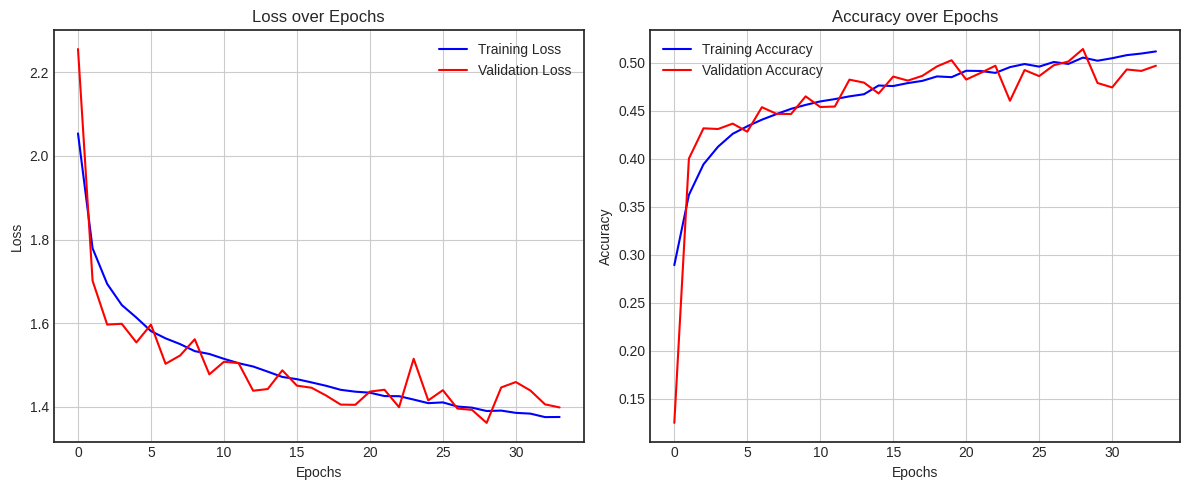

In [34]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
import matplotlib.pyplot as plt

# 손실(Loss) 그래프
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 정확도(Accuracy) 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## 모델 평가 및 예측

In [36]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)

print(f"테스트 손실: {test_loss:.4f}")
print(f"테스트 정확도: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5124 - loss: 1.3538
테스트 손실: 1.3591
테스트 정확도: 0.5113
